In [1]:
import math
import numpy
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
train_path="./ex6Data.csv"

In [3]:
data=[]
with open(train_path,'r') as f:
  ok=0
  for j in f:
    if ok==0:
      ok=1
      continue
    else:
      j=j.replace('\n','')
      now_data=j.split(',')
      linshi=[]
      for i in now_data:
        linshi.append(float(i))
      data.append(linshi)

In [4]:
def cmp(X):
  return X[0]

In [5]:
def swatch(X,i):
  for j in range(len(X)):
    X[j][0],X[j][i]=X[j][i],X[j][0]
  return X

In [6]:
def entropy(p):
  if p==0 or p==1:
    return 0
  else:
    try:
      return -p*math.log2(p)-(1-p)*math.log2(1-p)
    except:
      return 0
def get_num(now_positive,now_negative,sum_positive,sum_negative):
  now_sum=now_positive+now_negative
  all_sum=sum_positive+sum_negative
  sheng_sum=all_sum-now_sum
  sheng_positive=sum_positive-now_positive

  end=(now_sum/all_sum)*entropy(now_positive/now_sum)+(sheng_sum/all_sum)*entropy(sheng_positive/sheng_sum)


  start=entropy(sum_positive/all_sum)

  attain=start-end
  return attain




In [7]:
class node:
  def __init__(self):
    self.position=0
    self.number=0
    self.nowtype=0 #0表示左边是假
    self.left_son=-1
    self.right_son=-1
  def set_left(self,number):
    self.left_son=number
  def set_right(self,number):
    self.right_son=number
  def find_ans(self,input,test=True):
    if test:
      maxnum=0
      sum_positive=0
      sum_negative=0
      lll=0
      l2=0
      ok=1
      for i in range(len(input)):
        if input[i][-1]==0:
          sum_negative=sum_negative+1
        else:
          sum_positive=sum_positive+1
      print("shiji",(sum_positive+0.0001)/(sum_negative+0.0001))
      for i in range(len(input[0])-1):
        now_positive=0
        now_negative=0
        input=swatch(input,i)
        input.sort(key=cmp)
        for j in range(len(input)-1):
          if input[j][-1]==0:
            now_negative=now_negative+1
          else:
            now_positive=now_positive+1

          if input[j][0]==input[j+1][0]:
            continue

          linshi=get_num(now_positive,now_negative,sum_positive,sum_negative)
          if linshi>maxnum:
            lll=now_positive/(now_negative+0.0001)
            l2=(sum_positive-now_positive+0.0001)/(sum_negative-now_negative+0.0001)
            self.position=i
            maxnum=linshi
            self.number=input[j][0]+1e-9

            if lll>l2:
              self.nowtype=1
            else:
              self.nowtype=0
        input=swatch(input,i)

      left_return=[]
      right_return=[]
      for i in input:
        if i[self.position]<self.number:
          left_return.append(i)
        else:
          right_return.append(i)

      if now_negative==0 or now_positive==0 or maxnum<=0.02:
        ok = 0
      return left_return,right_return,maxnum,ok


    else:
      if input[self.position]<=self.number and self.nowtype==1:
        return True,self.left_son
      elif input[self.position]>self.number and self.nowtype==1:
        return False,self.right_son
      elif input[self.position]>self.number and self.nowtype==0:
        return True,self.right_son
      elif input[self.position]<=self.number and self.nowtype==0:
        return False,self.left_son

In [8]:
tree=[]
def build_left(input,father=-1):
  now_node=node()
  left,right,max_number,ok=now_node.find_ans(input)
  if not ok:
    return
  print(now_node.position,now_node.number,now_node.nowtype,"*****left",len(left),len(right))
  tree.append(now_node)
  tree[father].set_left(len(tree)-1)
  now_father=len(tree)-1
  build_left(left,now_father)
  build_right(right,now_father)


def build_right(input,father=-1):
  now_node=node()
  left,right,max_number,ok=now_node.find_ans(input)
  if not ok:
    return
  print(now_node.position,now_node.number,now_node.nowtype,"*****left",len(left),len(right))
  tree.append(now_node)
  tree[father].set_right(len(tree)-1)
  now_father=len(tree)-1
  build_left(left,now_father)
  build_right(right,now_father)
def train(input):
  root=node()
  tree.append(root)
  left,right,max_number,ok=tree[-1].find_ans(input)
  print(tree[-1].position,tree[-1].number,root.nowtype,"*****left",len(left),len(right))
  build_left(left,0)
  build_right(right,0)
train_data=data[:1500]+data[2000:]
train(train_data)

shiji 0.2825896972123156
10 10.600000001 0 *****left 2497 1901
shiji 0.10194178720468723
1 0.200000001 1 *****left 547 1950
shiji 0.32125620259512017
7 0.9978400009999999 0 *****left 451 96
shiji 0.21891913002185678
9 0.810000001 0 *****left 444 7
shiji 0.2000002162161578
6 144.000000001 1 *****left 294 150
shiji 0.26724169515444174
0 6.400000001 0 *****left 107 187
shiji 0.10309370815081634
10 10.000000001 0 *****left 68 39
shiji 0.014926843392771054
6 134.000000001 0 *****left 64 4
shiji 1.5624975585975647e-06
shiji 0.33335555481483947
5 42.000000001 1 *****left 1 3
shiji 10001.0
shiji 3.333222225925802e-05
shiji 0.3000023333255556
3 5.300000001 0 *****left 31 8
shiji 0.10714604590697892
5 16.000000001 1 *****left 10 21
shiji 0.42857959172011834
4 0.040000001 0 *****left 8 2
shiji 0.14286938758017742
2 0.32000000100000003 0 *****left 7 1
shiji 1.4285510206997044e-05
shiji 10001.0
shiji 20001.0
shiji 4.76188208627578e-06
shiji 2.9999000049997497
1 0.170000001 1 *****left 6 2
shiji 600

In [9]:
print(len(data))

4898


In [10]:
G = nx.DiGraph()


位置10值10.6
位置1值0.20
位置7值0.99
位置9值0.81
位置6值144.
位置0值6.40
位置10值10.0
位置6值134.
位置5值42.0
位置3值5.30
位置5值16.0
位置4值0.04
位置2值0.32
位置1值0.17
位置0值7.50
位置9值0.68
位置9值0.35
位置6值131.
位置2值0.23
位置2值0.36
位置3值9.00
位置9值0.37
位置2值0.25
位置3值2.00
位置4值0.03
位置4值0.04
位置6值127.
位置7值0.99
位置1值0.11
位置3值5.30
位置0值6.60
位置7值0.99
位置4值0.04
位置6值99.0
位置0值6.50
位置4值0.04
位置6值120.
位置0值7.00
位置2值0.29
位置8值3.10
位置8值3.13
位置0值7.20
位置4值0.04
位置9值0.32
位置0值8.60
位置6值84.0
位置6值74.0
位置0值7.20
位置0值6.60
位置6值173.
位置3值12.4
位置10值10.3
位置3值1.20
位置0值7.40
位置6值157.
位置1值0.19
位置1值0.18
位置2值0.30
位置10值9.10
位置0值6.10
位置7值0.99
位置4值0.05
位置2值0.64
位置10值11.7
位置5值21.0
位置0值6.30
位置10值12.4
位置5值12.0
位置3值1.60
位置10值12.2
位置5值14.0
位置7值0.98
位置8值3.37
位置2值0.33
位置5值16.0
位置7值0.98
位置5值14.0
位置1值0.36
位置9值0.45
位置9值0.47
位置10值13.1
位置0值5.80
位置2值0.26
位置1值0.12
位置6值63.0
位置4值0.04
位置4值0.04
位置8值3.05
位置6值87.0
位置5值10.0
位置1值0.30
位置9值0.40
位置2值0.33
位置3值6.10
位置0值6.80
位置0值7.70
位置3值2.80
位置8值3.29
位置2值0.24
位置0值6.40
位置2值0.48
位置7值0.99
位置4值0.03
位置6值82.0
位置8值3.23
位置1值0.26
位置3值4.00
位置3值1.70
位置8值2.98
位置5值44.0
位置

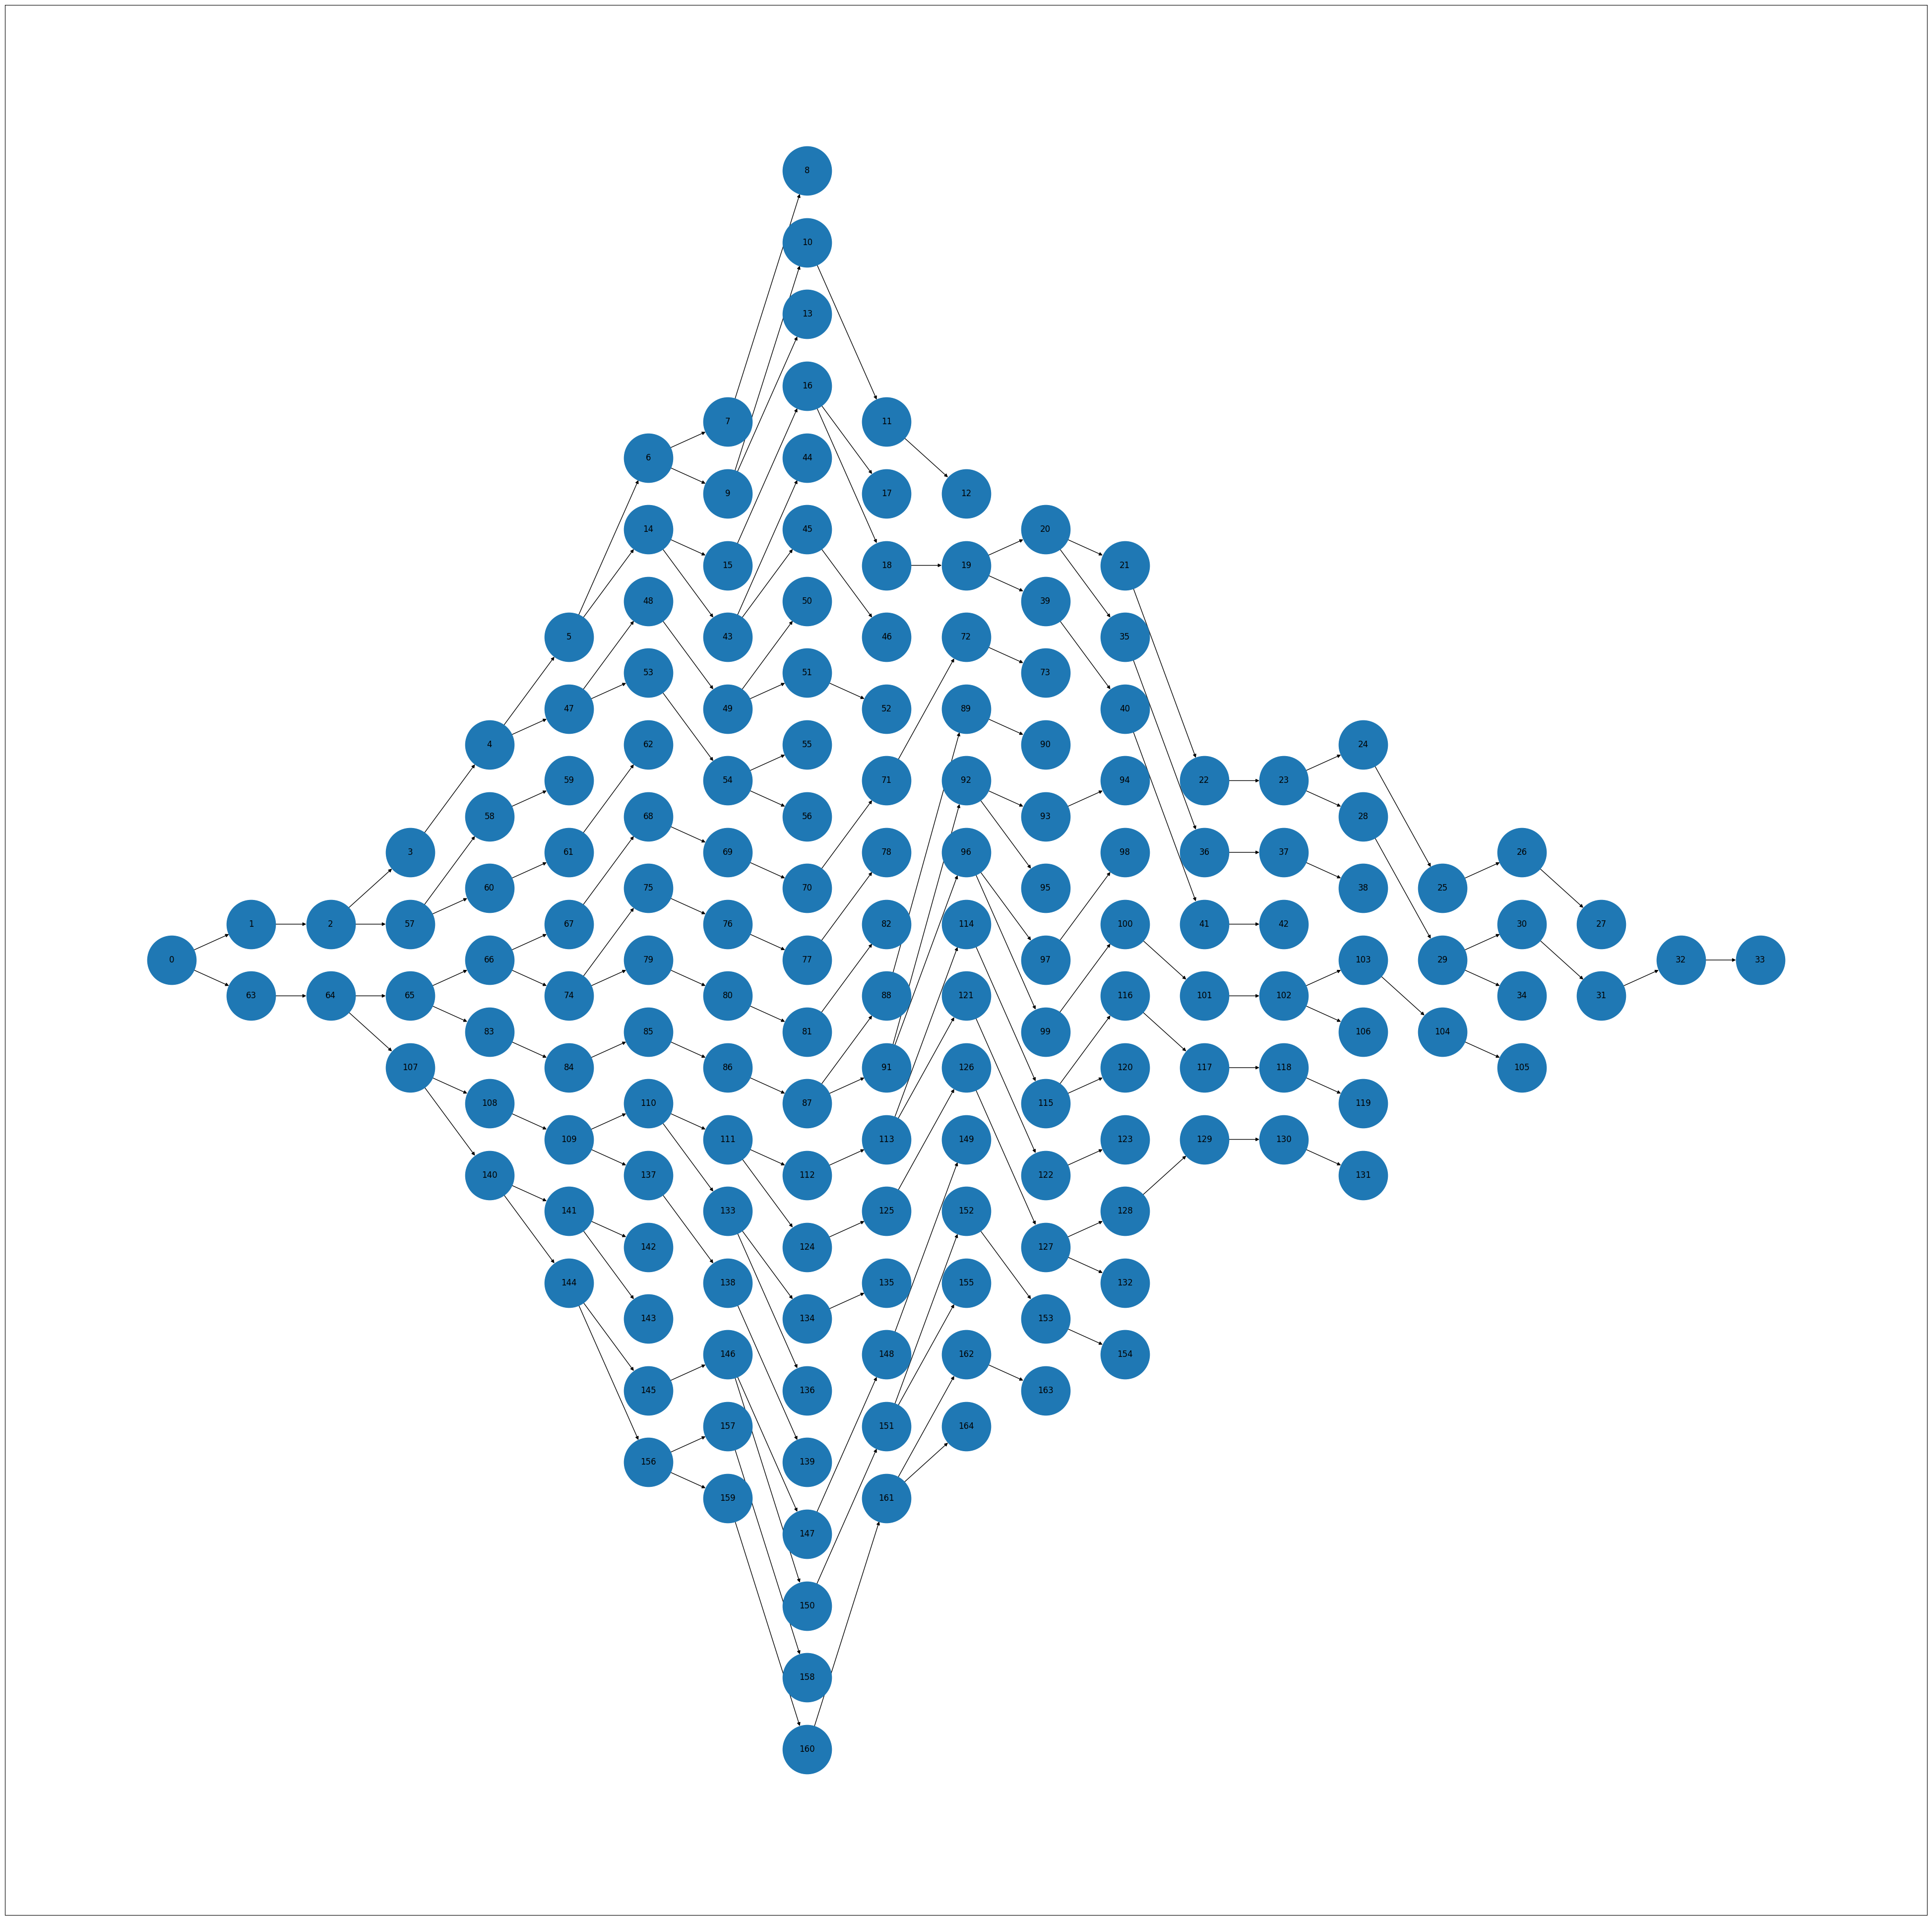

In [11]:
plt.figure(figsize=(50,50))
def print_tree(now_number,deep,father):
  if now_number==-1:
    return
  message=""+"位置"+str(tree[now_number].position)+"值"+str(tree[now_number].number)[0:4]
  print(message)
  G.add_node(str(now_number),subset=deep,message=message)
  if father!=-1:
    G.add_edge(str(father),str(now_number))
  print_tree(tree[now_number].left_son,deep+1,now_number)
  print_tree(tree[now_number].right_son,deep+1,now_number)
print_tree(0,0,-1)
pos = nx.multipartite_layout(G)
nx.draw_networkx(G,node_size=5000,pos=pos)
plt.show()

In [12]:
def test(input):
  nownumber=0
  while nownumber!=-1:
    nowtype,nownumber=tree[nownumber].find_ans(input,False)
  if nowtype==input[-1]:
    return 1
  return 0
jishu=0
for i in data[1500:2000]:
  jishu=jishu+test(i)
print(jishu/500)

0.798
